# Image Transformations

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

%matplotlib inline

In [2]:
img = cv2.imread('images/Edison.jpg')
height, width = img.shape[0:2]
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # same as img_rgb = img[:, :, ::-1]

Text(0.5,1,'Original')

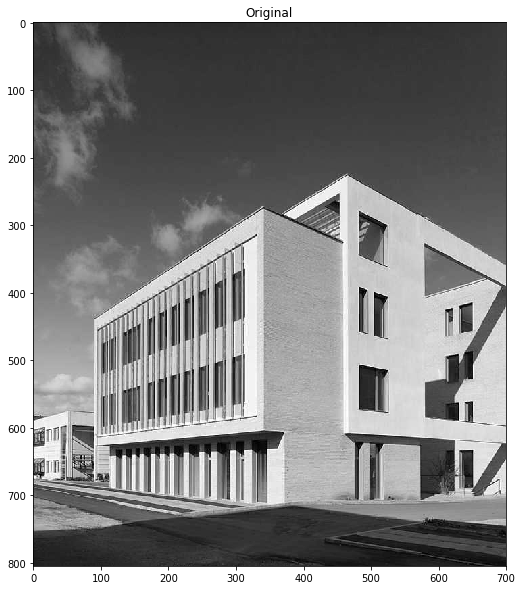

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_gray, cmap='gray', interpolation='nearest')
ax.set_title('Original')

Text(0.5,1,'Original')

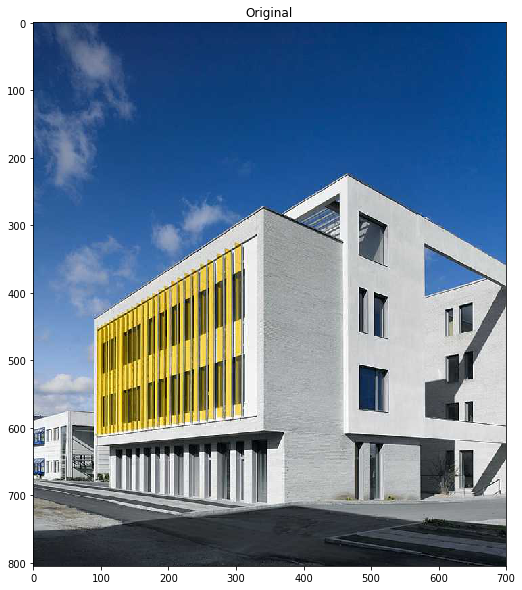

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_rgb, interpolation='nearest')
ax.set_title('Original')

## Rotation around a fixed point

Center point (350.0,402.5)


Text(0.5,1,'Rotated around point (350.0,402.5')

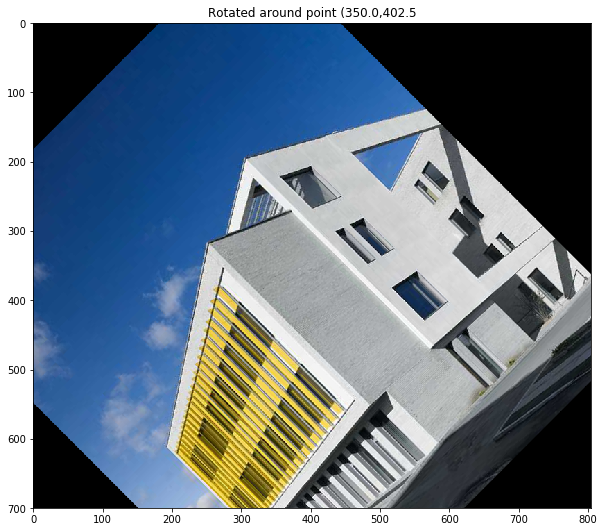

In [5]:
# Rotation around the center (i.e. translation + rotation)
cx = width / 2
cy = height / 2
print('Center point ({},{})'.format(cx, cy))

# Translation matrix
t1 = np.float32(
    [
        [1,  0,  cx],
        [0,  1,  cy],
        [0,  0,  1]
    ]
)

# Rotation matrix
angle_rad = 45 * np.pi/180
cos_val = np.cos(angle_rad)
sin_val = np.sin(angle_rad)
t2 = np.float32(
    [
        [cos_val,   sin_val,  0],
        [-sin_val,  cos_val,  0],
        [0, 0, 1]
    ]
)

# Translation matrix to move the image back
t3 = np.float32(
    [
        [1,  0,  -cx],
        [0,  1,  -cy],
        [0,  0,  1]
    ]
)

# Multiple all matrices
result_matrix = np.matmul(np.matmul(t1, t2), t3)

# Remove the last row otherwise cv2.warpAffine() complains
final_t = result_matrix[:2,:3]

img_rgb_rotated = cv2.warpAffine(img_rgb, final_t, (height, width))

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(img_rgb_rotated, interpolation='nearest')
ax.set_title('Rotated around point ({},{}'.format(cx,cy))

### Using the cv2.getRotationMatrix2D function

Text(0.5,1,'Rotated around point (350.0,402.5')

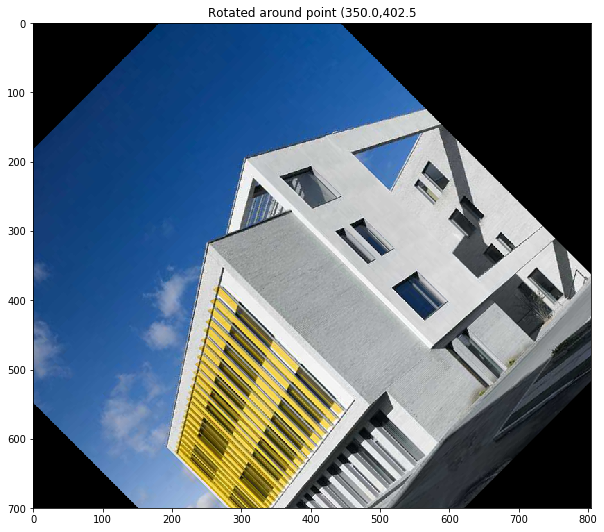

In [6]:
cx = width / 2
cy = height / 2
rotation_matrix = cv2.getRotationMatrix2D((cx, cy), 45, 1)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.warpAffine(img_rgb, rotation_matrix, (height, width)), interpolation='nearest')
ax.set_title('Rotated around point ({},{}'.format(cx,cy))

## Sheer transformation

Text(0.5,1,'Sheer transformation')

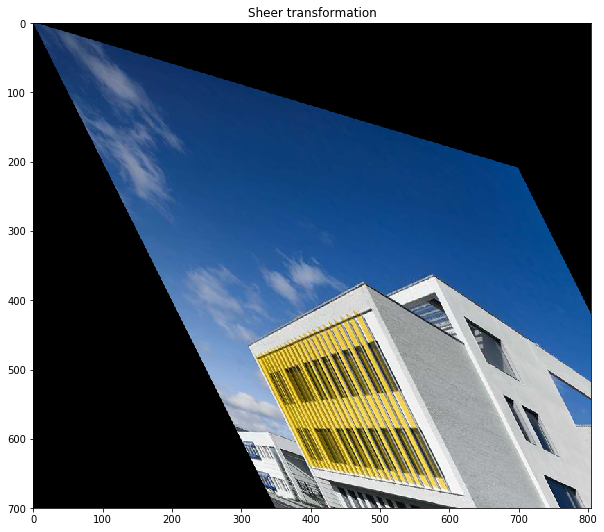

In [7]:
# Define matrix for sheer transformation
sheer = np.float32(
    [
        [1,  .5,  0],
        [.3,  1,  0]
    ]
)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.warpAffine(img_rgb, sheer, (height, width)), interpolation='nearest')
ax.set_title('Sheer transformation')

## Affine transformation

Text(0.5,1,'Affine transformation')

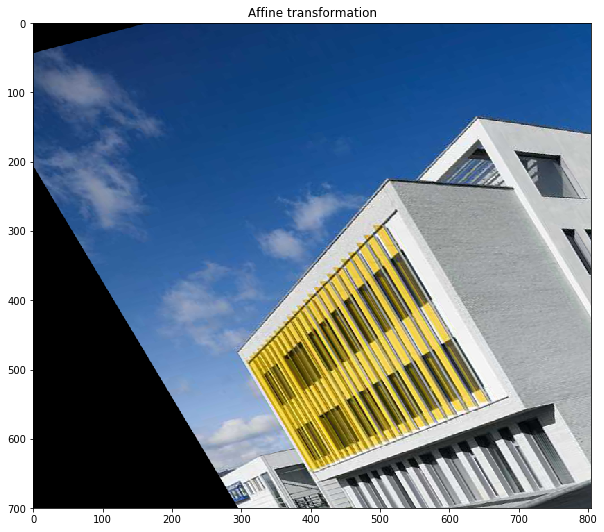

In [8]:
original_points = np.float32(
    [
        [ 50,   50],
        [200,   50],
        [ 50,  200]
    ]
)
desired_points = np.float32(
    [
        [ 10,  100],
        [200,   50],
        [100,  250]
    ]
)

# Compute affine transformation matrix from three pairs of points
affine_matrix = cv2.getAffineTransform(original_points, desired_points)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.warpAffine(img_rgb, affine_matrix, (height, width)))
ax.set_title('Affine transformation')

## Projective Transformation

Text(0.5,1,'Wrapped image')

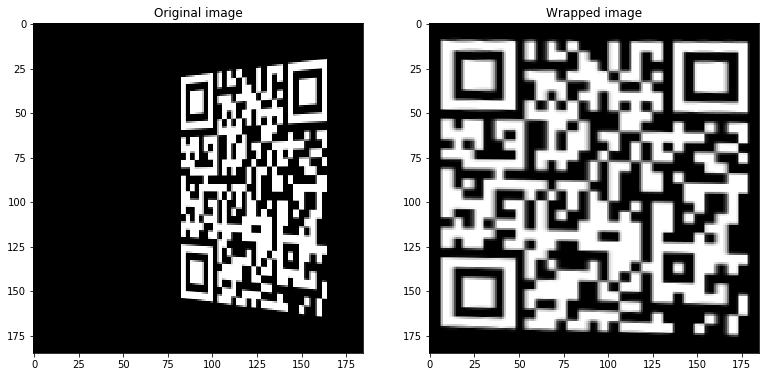

In [9]:
original_points = np.float32(
    [
        [ 84,   30],
        [ 84,  154],
        [160,  160],
        [160,   20],
    ]
)
desired_points = np.float32(
    [
        [ 10,   10],
        [ 10,  170],
        [170,  170],
        [170,   10]
    ]
)

# Compute projective transformation matrix from four pairs of points
projection_matrix = cv2.getPerspectiveTransform(original_points, desired_points)

img_qr_code = cv2.imread('images/qr-code.png')
height, width = img_qr_code.shape[0:2]
img_qr_code = cv2.cvtColor(img_qr_code, cv2.COLOR_BGR2RGB)

img_wrapped = cv2.warpPerspective(img_qr_code, projection_matrix, (height, width))

fig, ax = plt.subplots(1, 2, figsize=(13, 13))

ax[0].imshow(img_qr_code)
ax[0].set_title('Original image')

ax[1].imshow(img_wrapped)
ax[1].set_title('Wrapped image')